<a href="https://colab.research.google.com/github/sydas13/wellness-personas-of-snu/blob/main/Wellness_Personas_of_SNU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files

In [50]:
import pandas as pd

In [51]:
uploaded = files.upload()

Saving Data Collection.csv to Data Collection (2).csv


In [52]:
df = pd.read_csv("Data Collection.csv")

In [53]:
# Look at first 5 rows
df.head()

,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167 cm,80 kg,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1


In [54]:
# Select relevant columns
df_lifestyle = df[[
    "Eating Out Per week",
    "Food Budget per meal Note: Provide integer value for eg like-199",
    "Sweet tooth level (1 is low and 5 is high)",
    "Weekly_hobby_hours   \nprovide values integer between between 0-40"
]]
df_lifestyle.columns=["eating_out_per_week","food_budget_per_meal_inr","sweet_tooth_level","weekly_hobby_hours"]

In [55]:
df_lifestyle.head()

,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
0,7,199,4,0
1,7,150,2,40
2,3,100,2,5
3,7,180,4,10
4,4,200,4,5


In [56]:
# Converting all to numeric
df_lifestyle = df_lifestyle.apply(pd.to_numeric, errors="coerce")

In [57]:
df_lifestyle.head()

,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
0,7,199.0,4,0.0
1,7,150.0,2,40.0
2,3,100.0,2,5.0
3,7,180.0,4,10.0
4,4,200.0,4,5.0


In [58]:
# Drop rows with missing values
df_lifestyle = df_lifestyle.dropna()

In [59]:
df_lifestyle.head()

,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
0,7,199.0,4,0.0
1,7,150.0,2,40.0
2,3,100.0,2,5.0
3,7,180.0,4,10.0
4,4,200.0,4,5.0


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Scaling the features so big numbers dont dominate.
X_scaled = scaler.fit_transform(df_lifestyle)

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = {}
#Trying different cluster counts and check silhouette scores.
for k in range(2, 7):  # try 2 to 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score

scores

{2: np.float64(0.3380092397840081),
 3: np.float64(0.3520319198990049),
 4: np.float64(0.2967274948705539),
 5: np.float64(0.3090855602206661),
 6: np.float64(0.33192008850809734)}

In [62]:
#Picking the best k
best_k = max(scores, key=scores.get)

In [63]:
#Clustering with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [64]:
#Each student assigned to a particular cluster
df_lifestyle["cluster"] = kmeans.fit_predict(X_scaled)

In [65]:
df_lifestyle.head()

,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours,cluster
0,7,199.0,4,0.0,2
1,7,150.0,2,40.0,1
2,3,100.0,2,5.0,0
3,7,180.0,4,10.0,2
4,4,200.0,4,5.0,0


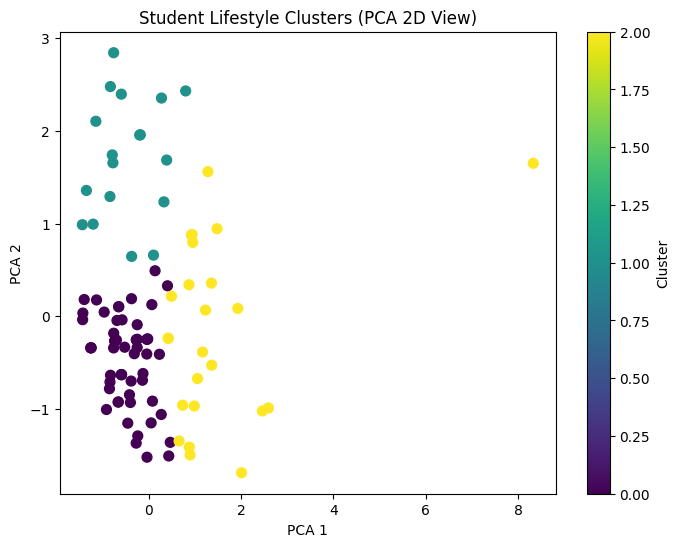

In [66]:
#Visualize clusters in 2D using PCA.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df_lifestyle["cluster"], cmap="viridis", s=50
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Student Lifestyle Clusters (PCA 2D View)")
plt.colorbar(label="Cluster")
plt.show()

In [67]:
#Find mean values of each feature inside each cluster
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=["eating_out_per_week", "food_budget_per_meal_inr", "sweet_tooth_level", "weekly_hobby_hours"]
)
print(cluster_centers.round(2))


   eating_out_per_week  food_budget_per_meal_inr  sweet_tooth_level  \
0                -0.51                     -0.10               0.03   
1                -0.16                     -0.12              -1.18   
2                 1.36                      0.34               0.81   

   weekly_hobby_hours  
0               -0.51  
1                1.32  
2                0.24  


In [68]:
# Define mapping of cluster number to persona names
cluster_names = {
    0: "Balanced but Low-Engagement",
    1: "Health-Conscious, Active",
    2: "Fast-Food Lovers / Social Foodies"
}

# Add a new column with persona labels
df_lifestyle["persona"] = df_lifestyle["cluster"].map(cluster_names)

print(df_lifestyle.head())

   eating_out_per_week  food_budget_per_meal_inr  sweet_tooth_level  \
0                    7                     199.0                  4   
1                    7                     150.0                  2   
2                    3                     100.0                  2   
3                    7                     180.0                  4   
4                    4                     200.0                  4   

   weekly_hobby_hours  cluster                            persona  
0                 0.0        2  Fast-Food Lovers / Social Foodies  
1                40.0        1           Health-Conscious, Active  
2                 5.0        0        Balanced but Low-Engagement  
3                10.0        2  Fast-Food Lovers / Social Foodies  
4                 5.0        0        Balanced but Low-Engagement  


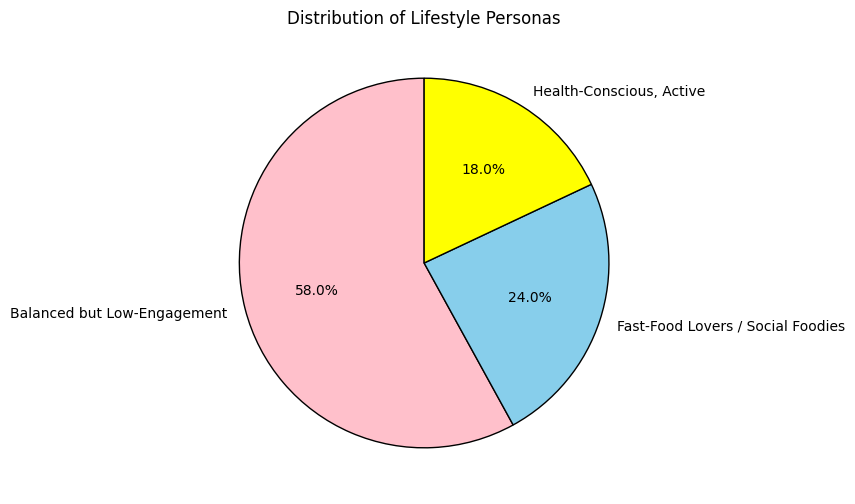

In [69]:
#Pie Chart (distribution of students across personas)
df_lifestyle["persona"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", figsize=(6,6), startangle=90,
    colors=["pink", "skyblue", "yellow"], wedgeprops={"edgecolor": "black"}
)
plt.title("Distribution of Lifestyle Personas")
plt.ylabel("")
plt.show()


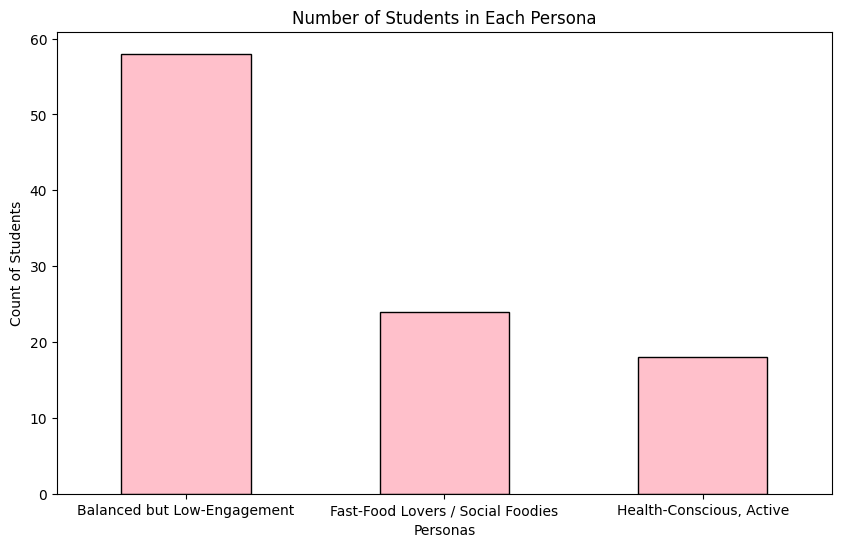

In [70]:
#Bar Chart (number of students in each persona)
plt.figure(figsize=(10,6))
df_lifestyle['persona'].value_counts().sort_index().plot(kind='bar', color='pink'
,edgecolor='black')
plt.title("Number of Students in Each Persona")
plt.xlabel("Personas")
plt.ylabel("Count of Students")
plt.xticks(rotation=0)
plt.show()

In [71]:
df_lifestyle.loc[12]

,12
eating_out_per_week,7
food_budget_per_meal_inr,350.0
sweet_tooth_level,3
weekly_hobby_hours,25.0
cluster,2
persona,Fast-Food Lovers / Social Foodies
